In [40]:
import tfutils

import importlib
importlib.reload(tfutils)

<module 'tfutils' from '/mnt/c/Users/lucac/projects/morocco-wc-project2/tfutils.py'>

In [41]:
fname = './data/TRACKING DATA_2021206_SYR-MTN/129650_TF05_PMS.xml'
source = tfutils.TracabTf05Xml(fname)

In [42]:
source.parse()

In [43]:
source.summary()

Source file: ./data/TRACKING DATA_2021206_SYR-MTN/129650_TF05_PMS.xml
Home team name and ID:Syria, 43838
Away team name and ID: Mauritania, 43870
Match date: 2021-12-06 18:00:00
Match ID: 129650
Match duration: 98.614 minutes


In [37]:
source.get_team('home')

<Element 'HomeTeam' at 0x7fe815b7dc10>

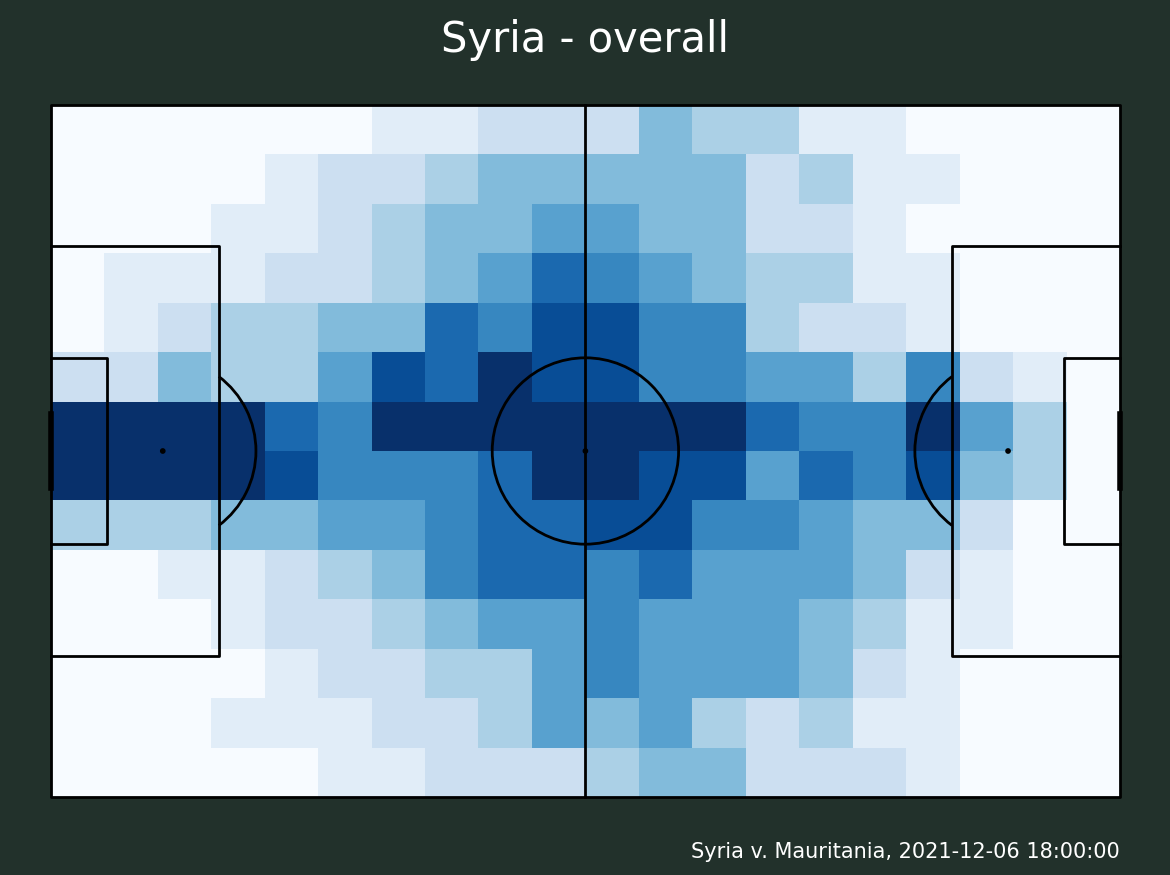

In [39]:
params = source.team_heatmap('home')

In [31]:
source.get_team_players('Mauritania')

,id,jersey,name,team
0,431494,1,M'backe N'DIAYE,Mauritania
1,391160,2,El Mostapha DIAW,Mauritania
2,431495,3,Mohamedhen BEIBOU,Mauritania
3,433176,4,Harouna ABOU,Mauritania
4,436778,6,Gussouma FOFANA,Mauritania
5,431501,7,Idrissa THIAM,Mauritania
6,393847,8,Amadou NIASS,Mauritania
7,431516,9,Hemeya TANJI,Mauritania
8,395993,10,Adama BÀ,Mauritania
9,431489,12,Alassane DIOP,Mauritania


(<matplotlib.collections.QuadMesh at 0x7fe815ae5690>,
 <Figure size 1307.75x900 with 3 Axes>,
 {'pitch': <Axes: >, 'title': <Axes: >, 'endnote': <Axes: >})

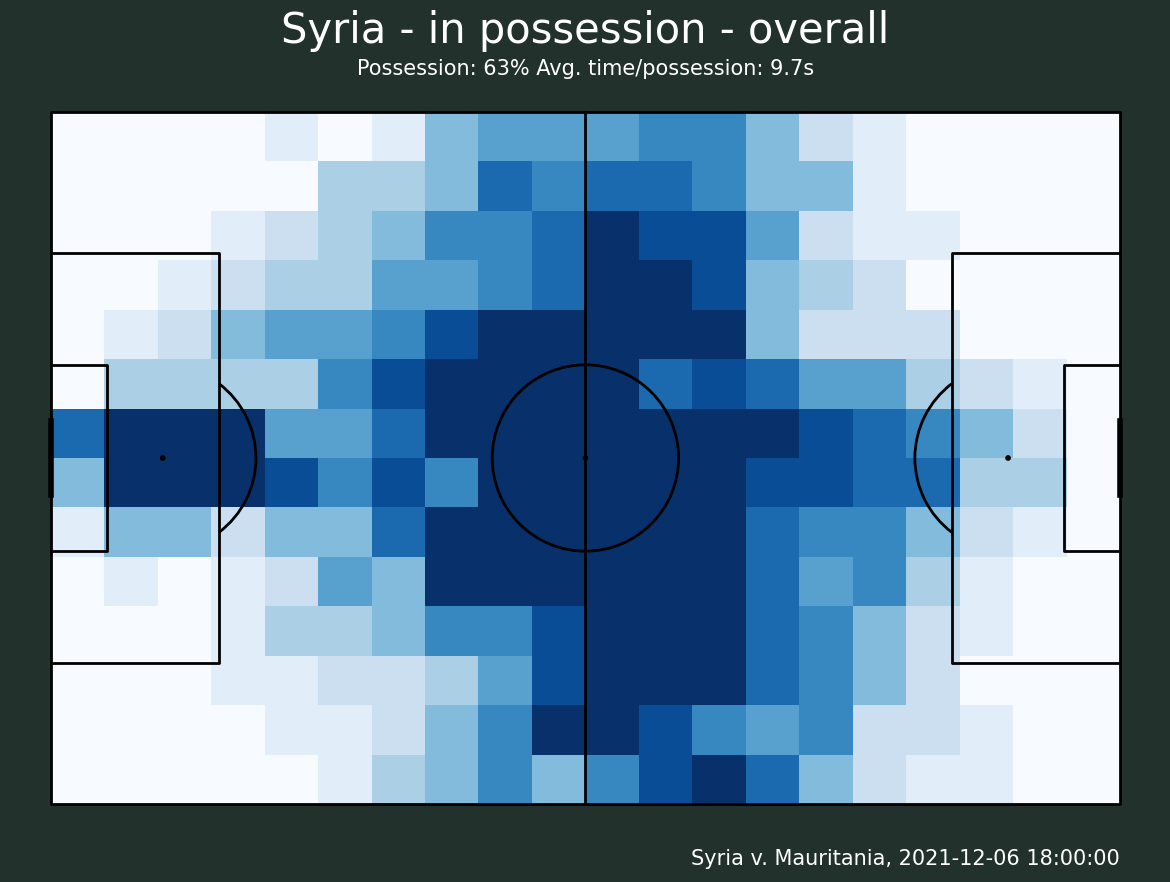

In [32]:
source.team_possession_heatmap('home')